In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", index_col=None).iloc[:, 1:]
df

,gender,program,freq,cost,time,income,state,mode<10,mode>10,dist
0,male,ug,3-4,5500.0,6.0,>5,Rajasthan,flight,flight,1350
1,male,pg,3-4,3000.0,30.0,<5,Rajasthan,train,train,1350
2,male,ug,<2,2000.0,30.0,>5,Rajasthan,train,train,1350
3,male,ug,<2,5000.0,24.0,<5,Rajasthan,flight,train,1350
4,male,ug,<2,2500.0,40.0,>5,Rajasthan,flight,train,1350
...,...,...,...,...,...,...,...,...,...,...
237,male,ug,<2,6000.0,24.0,>5,Jammu & Kashmir,flight,train,2100
238,male,ug,<2,8000.0,12.0,>5,Jammu & Kashmir,flight,flight,2100
239,male,ug,>10,8000.0,48.0,<5,Bihar,road,flight,1400
240,male,pg,<2,2000.0,15.0,>5,Chhattisgarh,train,train,680


In [3]:
df2 = df[['cost','mode<10','mode>10']]
df2

,cost,mode<10,mode>10
0,5500.0,flight,flight
1,3000.0,train,train
2,2000.0,train,train
3,5000.0,flight,train
4,2500.0,flight,train
...,...,...,...
237,6000.0,flight,train
238,8000.0,flight,flight
239,8000.0,road,flight
240,2000.0,train,train


In [17]:
df_flight = df2[(df2['mode<10'] == 'flight') & (df2['mode>10'] == 'flight') & (df2.cost < 15000)].cost
print(len(df_flight))
df_flight

42


0       5500.0
5       6000.0
6       4000.0
11      7000.0
13      4000.0
27      5000.0
34      5000.0
137     7000.0
138     5000.0
141    11000.0
149    10000.0
152     3000.0
159     7000.0
166     4000.0
175     7000.0
176    10000.0
178     7000.0
180    10000.0
181     6000.0
182     6000.0
183     7000.0
186     9000.0
188     2000.0
189     9500.0
190     7000.0
196     7000.0
200     9000.0
208     6000.0
209     5000.0
211     4000.0
215     8000.0
220     6000.0
222     9000.0
224    10000.0
226    10000.0
227    11000.0
230     7000.0
233     8000.0
234     6000.0
235     6000.0
238     8000.0
241     3500.0
Name: cost, dtype: float64

In [18]:
df_flight.describe()

count       42.000000
mean      6845.238095
std       2272.551202
min       2000.000000
25%       5125.000000
50%       7000.000000
75%       8750.000000
max      11000.000000
Name: cost, dtype: float64

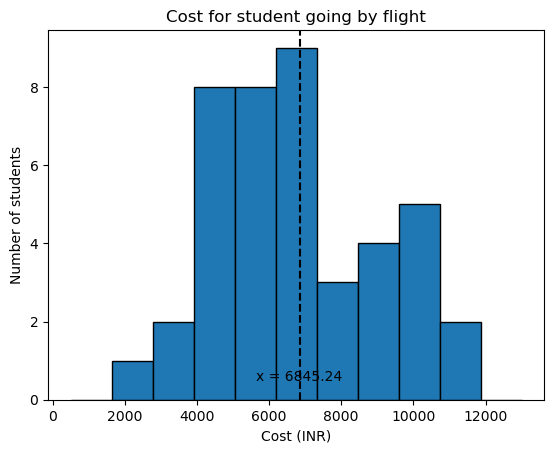

In [34]:
edges = np.linspace(500, 13000, 12)
plt.hist(df_flight, bins= edges, edgecolor='black')

# Adding title and labels
plt.title('Cost for student going by flight')
plt.xlabel('Cost (INR)')
plt.ylabel('Number of students')
plt.axvline(x=df_flight.mean(), color='black', linestyle='--')
plt.text(df_flight.mean(), plt.gca().get_ylim()[1] * 0.05, f'x = {df_flight.mean():.2f}', 
         horizontalalignment='center')
plt.savefig('cost_flight.png')
plt.show()

In [6]:
df_train = df2[(df2['mode<10'] == 'train') & (df2['mode>10'] == 'train')].cost
print(len(df_train))
df_train

72


1      3000.0
2      2000.0
8      1800.0
10     5000.0
12     3000.0
        ...  
218    2500.0
219    2500.0
225    1300.0
232    3000.0
240    2000.0
Name: cost, Length: 72, dtype: float64

In [7]:
df_train.describe()

count      72.000000
mean     1999.305556
std      1079.302496
min       500.000000
25%      1000.000000
50%      2000.000000
75%      2500.000000
max      5000.000000
Name: cost, dtype: float64

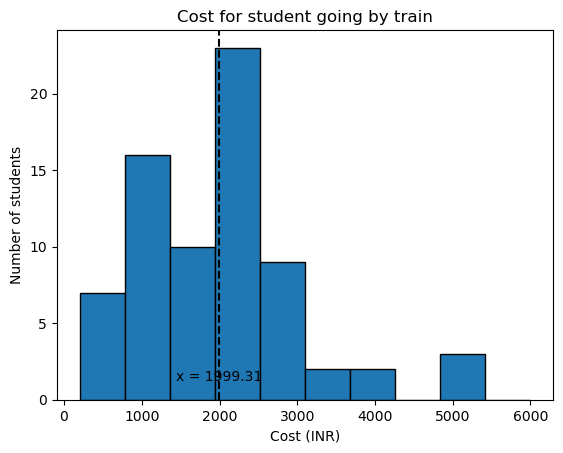

In [35]:
edges = np.linspace(200, 6000, 11)
plt.hist(df_train, bins= edges, edgecolor='black')

# Adding title and labels
plt.title('Cost for student going by train')
plt.xlabel('Cost (INR)')
plt.ylabel('Number of students')
plt.axvline(x=df_train.mean(), color='black', linestyle='--')
plt.text(df_train.mean(), plt.gca().get_ylim()[1] * 0.05, f'x = {df_train.mean():.2f}', 
         horizontalalignment='center')
plt.savefig('cost_train.png')
plt.show()

In [26]:
cf_std = df_flight.std()
cf_std*cf_std

5164488.966318236

In [27]:
ct_std = df_train.std()
ct_std*ct_std

1164893.8771518

In [10]:
ratio_std = (cf_std*cf_std) / (ct_std*ct_std)
ratio_std

14.560003205895788

In [11]:
n,m = len(df_flight), len(df_train)
n,m

(45, 72)

In [12]:
alpha = 0.05

In [13]:
lower_limit = ratio_std/(f.ppf(1 - (alpha/2), n-1, m-1))
upper_limit = ratio_std*(f.ppf(1 - (alpha/2), m-1, n-1))
(lower_limit, upper_limit)

(8.651679676323075, 25.357350302625026)

#### The 95% Confidence Interval for Var(Cost by Flight)/Var(Cost by Train) is (8.65, 25.36)